#Predict Breast Cancer with High Accuracy.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load dataset
df = pd.read_csv('data.csv', index_col=False)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#Get number of rows and columns and other statistics.
print(df.shape)
df.describe()

(569, 33)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
#Count the number of empty (NaN, NAN, na) vales in each column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
#Drop the column with all missing values and Encode the categorical data values
df['diagnosis'] = df['diagnosis'].apply(lambda x: '1' if x=='M' else '0')
df = df.set_index('id')
del df['Unnamed: 32']

In [8]:
#Get the new count of the number of rows and columns
df.shape

(569, 31)

In [11]:
#Get a count of the number of Malignant(1) or Benign(0) cells
print(df.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


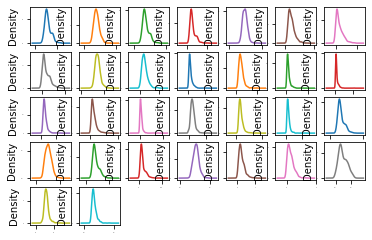

In [14]:
#Visualize the data using density plots
df.plot(kind='density', subplots=True, layout=(5, 7), sharex=False, legend=False, fontsize=1)
plt.show()

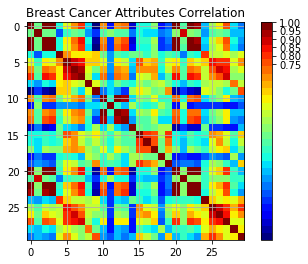

In [19]:
#Find and visualize correlation
from matplotlib import cm
fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(df.corr(), interpolation='none', cmap=cmap)
ax1.grid(True)
plt.title('Breast Cancer Attributes Correlation')
fig.colorbar(cax, ticks=[.75, .8, .85, .9, .95, 1])
plt.show()

In [21]:
#Split the dataset for training and testing.
from sklearn.model_selection import train_test_split
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

In [22]:
#Import the models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC())) 
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

In [26]:
#Find the best model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time

nums_folds=10
results = []
names = []

for name, model in models_list:
  kfold = KFold(n_splits=nums_folds)
  start = time.time()
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  end = time.time()
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f) (run time: %f)' % (name, cv_results.mean(), cv_results.std(), end-start))

CART: 0.912174 (0.036680) (run time: 0.066784)
SVM: 0.907681 (0.054723) (run time: 0.047143)
NB: 0.940773 (0.033921) (run time: 0.014572)
KNN: 0.927729 (0.055250) (run time: 0.035591)


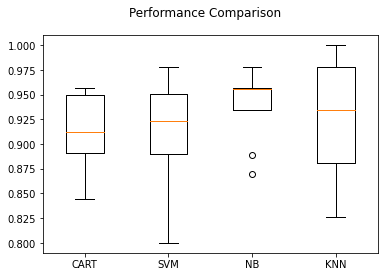

In [27]:
#Visualize the performance
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [30]:
#Evalute the alogorith on Standardised Data
import warnings 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipelines = []
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))

results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=nums_folds)
    for name, model in pipelines:
      start = time.time()
      cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
      end = time.time()
      results.append(cv_results)
      names.append(name)
      print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledCART: 0.907778 (0.029122) (run time: 0.081197)
ScaledSVM: 0.964879 (0.038621) (run time: 0.065876)
ScaledNB: 0.931932 (0.038625) (run time: 0.023172)
ScaledKNN: 0.958357 (0.038595) (run time: 0.049197)


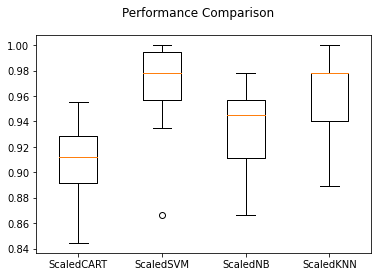

In [31]:
#Visualize the scaled performance
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [34]:
#Best Model: SVM ==> Tuning SVM
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=nums_folds, random_state=21)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 0.969324 using {'C': 2.0, 'kernel': 'rbf'}
0.964976 (0.026211) with: {'C': 0.1, 'kernel': 'linear'}
0.828551 (0.054707) with: {'C': 0.1, 'kernel': 'poly'}
0.940725 (0.038380) with: {'C': 0.1, 'kernel': 'rbf'}
0.949469 (0.032899) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.962754 (0.029531) with: {'C': 0.3, 'kernel': 'linear'}
0.863720 (0.050997) with: {'C': 0.3, 'kernel': 'poly'}
0.956039 (0.032900) with: {'C': 0.3, 'kernel': 'rbf'}
0.960386 (0.029499) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.956184 (0.030988) with: {'C': 0.5, 'kernel': 'linear'}
0.879034 (0.053507) with: {'C': 0.5, 'kernel': 'poly'}
0.964879 (0.030054) with: {'C': 0.5, 'kernel': 'rbf'}
0.956087 (0.027848) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.954010 (0.031644) with: {'C': 0.7, 'kernel': 'linear'}
0.885604 (0.038275) with: {'C': 0.7, 'kernel': 'poly'}
0.967053 (0.037461) with: {'C': 0.7, 'kernel': 'rbf'}
0.949565 (0.027831) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.951836 (0.028830) with: {'C': 0.9, 'kernel': 'linear'

We can see the most accurate configuration was SVM with an RBF kernel and C=2.0, with the accuracy of 96.92%.

In [36]:
#Fit the model to give best accuracy
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = SVC(C=2.0, kernel='rbf')
start = time.time()
model.fit(X_train_scaled, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.006321


In [39]:
#Predict the testing dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)
print(predictions)
print()
print(y_test)

['0' '0' '1' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0'
 '0' '0' '0' '1' '0' '1' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0'
 '0' '1' '1' '1' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1'
 '0' '1' '1' '1' '1' '0' '0' '1' '0' '1' '1' '1' '0' '0' '1' '0' '1' '1'
 '0' '1' '1' '0' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1'
 '0' '0' '1' '1' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0'
 '0' '1' '1' '0' '0' '1']

['0' '0' '1' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0'
 '0' '0' '0' '1' '0' '1' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0'
 '0' '1' '0' '1' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1'
 '0' '1' '1' '1' '1' '0' '0' '1' '0' '1' '1' '1' '0' '0' '1' '0' '1' '1'
 '0' '1' '1' '0' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1'
 '0' '0' '1' '1' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0'
 '0' '1' '1' '0' '0' '1']


In [41]:
#Get accuracy and classification report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy score 0.991228
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.97      1.00      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [43]:
#Get confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))

[[74  1]
 [ 0 39]]
